In [60]:
import matplotlib.pyplot as plt
import torch
import pandas as pd
from scipy.misc import derivative
import time

In [61]:
data= pd.read_csv("Misra1c_Data.txt",names=['y','x'], sep=" ")

data

,y,x
NaN,10.07,77.6
NaN,14.73,114.9
NaN,17.94,141.1
NaN,23.93,190.8
NaN,29.61,239.9
NaN,35.18,289.0
NaN,40.02,332.8
NaN,44.82,378.4
NaN,50.76,434.8
NaN,55.05,477.3


In [62]:
y = torch.from_numpy(data['y'].to_numpy(np.float64))
x = torch.from_numpy(data['x'].to_numpy(np.float64))

b = torch.tensor([500,0.0001],requires_grad=True)
# b = torch.tensor([600,0.0002],requires_grad=True)
# b = torch.tensor([636.42725809,.00020813627256],requires_grad=True)

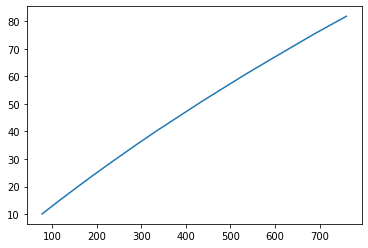

In [63]:
plt.plot(x.numpy(),y.numpy())

In [64]:
## Numerical Differentiation

# b = np.array([500,0.0001]).reshape(-1,1)
# # b = np.array([100.0,0.75]).reshape(-1,1)

# x=x.detach().numpy()

# u=0.1 #beta multiply identity matrix
# beta = 10
# V_prev = 0
    
# def f0(b0):
#     return  b0 * (1-(np.power(np.sqrt(1+2*b[1]*x),-1*np.ones(len(x)))))  -y.detach().numpy()  
# def f1(b1):
#     return b[0] * (1-(np.power(np.sqrt(1+2*b1*x),-1*np.ones(len(x))))) -y.detach().numpy()  

# start_time = time.perf_counter()
# for c in range(500):
    
#     y_pred = b[0] * (1-(np.power(np.sqrt(1+2*b[1]*x),-1*np.ones(len(x))))) 
#     error = (y_pred - y.detach().numpy()).reshape(-1,1)
    
#     d_b0 = derivative(f0,b[0] , dx=1e-6)
#     d_b1 = derivative(f1,b[1] , dx=1e-6)
     
#     jacobian = np.transpose(np.array([d_b0,d_b1]))
#     dParam = np.matmul(np.matmul(np.linalg.inv((np.matmul(np.transpose(jacobian),jacobian)+u*np.identity(len(b)))),np.transpose(jacobian)),error)
#     b -= dParam
#     V = np.sum(np.square(error))
#     if(V > V_prev):
#             u *= beta
#     else:
#             u /= beta
#     V_prev = V
#     print("c: ",c," error: ",V," B:", b)
#     if V < 4.0966836972E-02:
#         break
# print("time taken to execute: ",time.perf_counter()-start_time)    

In [65]:
def Jacobian(loss,params,numParams):
    
    jacobian = torch.empty(len(loss), numParams) 
    
    for i in range(len(loss)):
        
        loss[i].backward(retain_graph=True)
        
        for n in range(numParams):
            jacobian[i][n] = params.grad[n]
        params.grad.zero_()      
    return jacobian    

In [67]:
## Automatic Differentiation
num_param = len(b)
u=0.1 #beta multiply identity matrix
beta = 10
error_prev = 0
start_time = time.perf_counter()
for c in range(300):
    
    y_pred = b[0] * (1-(torch.pow(torch.sqrt(1+2*b[1]*x),-1*torch.ones(len(x))))) 
    
    loss = y_pred-y
    error = torch.sum(torch.square(loss)) #residual sum of squares
    print("",c," error is: ",error.detach().numpy()," b is ", b.detach().numpy())
    jacobian = Jacobian(loss,b,len(b))

    dParam = torch.matmul(torch.matmul(torch.inverse(torch.matmul(torch.transpose(jacobian,-1,0),jacobian)+u*torch.eye(num_param, num_param)),torch.transpose(jacobian,-1,0)),loss.float())
    with torch.no_grad():
        b -=dParam
    
        if(error > error_prev):
            u *= beta
        else:
            u /= beta
        error_prev = error
    if error< 4.0966836972E-02: #3.9050739624 given residual sum of squares
        break
print("time taken to execute: ",time.perf_counter()-start_time) 

 0  error is:  11603.016784954893  b is  [5.e+02 1.e-04]
 1  error is:  123.00439470907583  b is  [4.9995340e+02 2.5711764e-04]
 2  error is:  4.7587809513341135  b is  [4.9999155e+02 2.7669789e-04]
 3  error is:  4.707803200000707  b is  [5.0042725e+02 2.7661625e-04]
 4  error is:  4.353623068952772  b is  [5.0461172e+02 2.7382086e-04]
 5  error is:  2.9416314978756892  b is  [5.3414557e+02 2.5451268e-04]
 6  error is:  10.274888135079628  b is  [5.9949902e+02 2.1862633e-04]
 7  error is:  0.2365872220824975  b is  [6.334609e+02 2.086791e-04]
 8  error is:  0.04117550624381554  b is  [6.3527515e+02 2.0857441e-04]
 9  error is:  0.040968019761395275  b is  [6.3635437e+02 2.0816317e-04]
 10  error is:  0.04096683703139324  b is  [6.3642664e+02 2.0813651e-04]
 11  error is:  0.0409668369710738  b is  [6.3642725e+02 2.0813628e-04]
time taken to execute:  0.07092650000004141


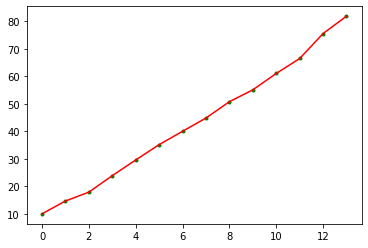

In [68]:
plt.plot(y_pred.detach(),'g.', y,'r')